In [1]:
import pandas as pd
import numpy as np
# import twint

import requests
import json
import os
from datetime import datetime
import time

In [2]:
pa_list_=os.listdir("/home/pranay5255/Documents/tweets/price_action_data/")

In [3]:
pa_list_

['ALCXBTC_5m_2022-01-01-00-00-00.csv',
 'RLCETH_2h_2022-01-01-00-00-00.csv',
 '1INCHUSDT_5m_2022-01-01-00-00-00.csv',
 'RNDRBTC_5m_2022-01-01-00-00-00.csv',
 'RNDRBTC_4h_2022-01-01-00-00-00.csv',
 'ALCXUSDT_5m_2022-01-01-00-00-00.csv',
 'GMTBTC_2h_2022-01-01-00-00-00.csv',
 '1INCHUSDT_12h_2022-01-01-00-00-00.csv',
 'RLCETH_1d_2022-01-01-00-00-00.csv',
 'GMTUSDT_2h_2022-01-01-00-00-00.csv',
 'GMTETH_4h_2022-01-01-00-00-00.csv',
 'APTUSDT_2h_2022-01-01-00-00-00.csv',
 'APTUSDT_5m_2022-01-01-00-00-00.csv',
 'ALCXBTC_2h_2022-01-01-00-00-00.csv',
 'GMTETH_2h_2022-01-01-00-00-00.csv',
 'REEFUSDT_12h_2022-01-01-00-00-00.csv',
 'GMTBTC_4h_2022-01-01-00-00-00.csv',
 'GMTUSDT_1h_2022-01-01-00-00-00.csv',
 'GMTETH_12h_2022-01-01-00-00-00.csv',
 'RNDRUSDT_4h_2022-01-01-00-00-00.csv',
 '1INCHBTC_5m_2022-01-01-00-00-00.csv',
 'RLCBTC_2h_2022-01-01-00-00-00.csv',
 'RLCBTC_5m_2022-01-01-00-00-00.csv',
 '1INCHBTC_1d_2022-01-01-00-00-00.csv',
 'RNDRUSDT_1d_2022-01-01-00-00-00.csv',
 'REEFUSDT_1h_2022-01

In [5]:
start_time = '2018-01-01 00:00:00'
end_time = '2022-12-31 23:59:59'

# Convert start and end times to timestamps in milliseconds
start_timestamp = int(pd.Timestamp(start_time).timestamp()) * 1000
end_timestamp = int(pd.Timestamp(end_time).timestamp()) * 1000

In [49]:
tickers=['SOLUSDT',
 'DOGEUSDT',
 'LINKUSDT',
 'MATICUSDT',
 'ATOMUSDT','FILUSDT','LTCUSDT','ADAUSDT','YFIUSDT',
 'ENJUSDT','XMRUSDT','AVAXUSDT','AAVEUSDT','ICPUSDT','NEARUSDT','SNXUSDT',
 'ALGOUSDT','UNIUSDT','CRVUSDT','MKRUSDT','DOTUSDT','COMPUSDT','1INCHUSDT',
 'CELOUSDT','EOSUSDT','SUSHIUSDT']


In [3]:
main_path=os.path.join('/home','pranay5255','Desktop','Price_action_data')
main_path

'/home/pranay5255/Desktop/Price_action_data'

In [38]:

def api_request(start_t,end_t,interval_time='15m'):
    
    
    # # Convert start and end times to timestamps in milliseconds
    start_t = int(pd.Timestamp(start_t).timestamp()) * 1000
    end_t = int(pd.Timestamp(end_t).timestamp()) * 1000
    price_df_main=pd.DataFrame()
    
    
    num_req=0
    
    while start_t<=end_t:
    # Set the API endpoint for BTC/USDT price data
        endpoint = 'https://api.binance.com/api/v3/klines'
        params = {
            'symbol': 'ETHUSDT',
            'interval': interval_time, # 1 hour interval
            'limit':500
        }


        # Add start and end time parameters to the API request
        params['startTime'] = start_t
        params['endTime'] = end_t
        
        # # Send a GET request to the endpoint with the specified parameters
        time.sleep(2)
        response = requests.get(endpoint, params=params)
        print(start_t,end_t)
#         print(response)
        # # Parse the response as JSON
        data = json.loads(response.text)

        price_df=pd.DataFrame(data,columns=["timestamp", "open", "high", "low",
                                            "close", "volume", "close_time", 
                                            "quote_asset_volume", "number_of_trades",
                                            "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", 
                                            "ignore"])
        
        price_df['timestamp']=price_df['timestamp'].apply(lambda x: pd.to_datetime(x,unit='ms'))
        price_df['close_time']=price_df['close_time'].apply(lambda x: pd.to_datetime(x,unit='ms'))
        
        
        price_df_main=pd.concat([price_df_main,price_df])
        
        
        
        response_endtimestamp=price_df['timestamp'].iat[-1].timestamp()
        
        
        if start_t==int(response_endtimestamp) * 1000:
            break
        else:
            start_t=int(response_endtimestamp) * 1000
            num_req+=1
        
        
        
        
        
        print("new df shape :{}".format(price_df_main.shape))
        print("total requests :{}".format(num_req))
        print(start_t,end_t)
    
    return(price_df_main)
    

In [42]:
import requests
import json
import os

include_years=[2018,2019,2020,2021,2022,2023]
intervals=['1d','15m','1h']
# include_years=[2018]
main_path=os.path.join('/home','pranay5255','Desktop','Price_action_data_hourly/')

for year in include_years:
    yearly_data_path=os.path.join(main_path,str(year))
    if not os.path.exists(yearly_data_path):
        os.mkdir(yearly_data_path)
        
  # Set the start and end times for the desired period
    start_time = f"{year}-01-01 00:00:00"
    end_time = f"{year}-12-31 23:59:59"
        
    data=api_request(start_t=start_time,end_t=end_time,interval_time=interval)

    data.drop_duplicates().reset_index()
    filename=f"{yearly_data_path}/{ticker}_{interval}_PA.csv"
    data.to_csv(filename)
    

# # Loop through the data points and print the timestamp and closing price
# indx=len(data)


# # for d in data:
# #     timestamp = d[0] / 1000  # Convert timestamp from milliseconds to seconds
# #     close_price = d[4]
# #     print(f"{timestamp}: {close_price}")


1514764800000 1546300799000
new df shape :(500, 12)
total requests :1
1515220200000 1546300799000
1515220200000 1546300799000
new df shape :(1000, 12)
total requests :2
1515669300000 1546300799000
1515669300000 1546300799000
new df shape :(1500, 12)
total requests :3
1516118400000 1546300799000
1516118400000 1546300799000
new df shape :(2000, 12)
total requests :4
1516567500000 1546300799000
1516567500000 1546300799000
new df shape :(2500, 12)
total requests :5
1517016600000 1546300799000
1517016600000 1546300799000
new df shape :(3000, 12)
total requests :6
1517465700000 1546300799000
1517465700000 1546300799000
new df shape :(3500, 12)
total requests :7
1517914800000 1546300799000
1517914800000 1546300799000
new df shape :(4000, 12)
total requests :8
1518486300000 1546300799000
1518486300000 1546300799000
new df shape :(4500, 12)
total requests :9
1518935400000 1546300799000
1518935400000 1546300799000
new df shape :(5000, 12)
total requests :10
1519384500000 1546300799000
1519384500

1551690000000 1577836799000
new df shape :(6500, 12)
total requests :13
1552139100000 1577836799000
1552139100000 1577836799000
new df shape :(7000, 12)
total requests :14
1552609800000 1577836799000
1552609800000 1577836799000
new df shape :(7500, 12)
total requests :15
1553058900000 1577836799000
1553058900000 1577836799000
new df shape :(8000, 12)
total requests :16
1553508000000 1577836799000
1553508000000 1577836799000
new df shape :(8500, 12)
total requests :17
1553957100000 1577836799000
1553957100000 1577836799000
new df shape :(9000, 12)
total requests :18
1554406200000 1577836799000
1554406200000 1577836799000
new df shape :(9500, 12)
total requests :19
1554855300000 1577836799000
1554855300000 1577836799000
new df shape :(10000, 12)
total requests :20
1555304400000 1577836799000
1555304400000 1577836799000
new df shape :(10500, 12)
total requests :21
1555753500000 1577836799000
1555753500000 1577836799000
new df shape :(11000, 12)
total requests :22
1556202600000 15778367990

1588655700000 1609459199000
new df shape :(12500, 12)
total requests :25
1589104800000 1609459199000
1589104800000 1609459199000
new df shape :(13000, 12)
total requests :26
1589553900000 1609459199000
1589553900000 1609459199000
new df shape :(13500, 12)
total requests :27
1590003000000 1609459199000
1590003000000 1609459199000
new df shape :(14000, 12)
total requests :28
1590452100000 1609459199000
1590452100000 1609459199000
new df shape :(14500, 12)
total requests :29
1590901200000 1609459199000
1590901200000 1609459199000
new df shape :(15000, 12)
total requests :30
1591350300000 1609459199000
1591350300000 1609459199000
new df shape :(15500, 12)
total requests :31
1591799400000 1609459199000
1591799400000 1609459199000
new df shape :(16000, 12)
total requests :32
1592248500000 1609459199000
1592248500000 1609459199000
new df shape :(16500, 12)
total requests :33
1592697600000 1609459199000
1592697600000 1609459199000
new df shape :(17000, 12)
total requests :34
1593146700000 1609

1625212800000 1640995199000
new df shape :(18000, 12)
total requests :36
1625661900000 1640995199000
1625661900000 1640995199000
new df shape :(18500, 12)
total requests :37
1626111000000 1640995199000
1626111000000 1640995199000
new df shape :(19000, 12)
total requests :38
1626560100000 1640995199000
1626560100000 1640995199000
new df shape :(19500, 12)
total requests :39
1627009200000 1640995199000
1627009200000 1640995199000
new df shape :(20000, 12)
total requests :40
1627458300000 1640995199000
1627458300000 1640995199000
new df shape :(20500, 12)
total requests :41
1627907400000 1640995199000
1627907400000 1640995199000
new df shape :(21000, 12)
total requests :42
1628356500000 1640995199000
1628356500000 1640995199000
new df shape :(21500, 12)
total requests :43
1628805600000 1640995199000
1628805600000 1640995199000
new df shape :(22000, 12)
total requests :44
1629270900000 1640995199000
1629270900000 1640995199000
new df shape :(22500, 12)
total requests :45
1629720000000 1640

1661653800000 1672531199000
new df shape :(23500, 12)
total requests :47
1662102900000 1672531199000
1662102900000 1672531199000
new df shape :(24000, 12)
total requests :48
1662552000000 1672531199000
1662552000000 1672531199000
new df shape :(24500, 12)
total requests :49
1663001100000 1672531199000
1663001100000 1672531199000
new df shape :(25000, 12)
total requests :50
1663450200000 1672531199000
1663450200000 1672531199000
new df shape :(25500, 12)
total requests :51
1663899300000 1672531199000
1663899300000 1672531199000
new df shape :(26000, 12)
total requests :52
1664348400000 1672531199000
1664348400000 1672531199000
new df shape :(26500, 12)
total requests :53
1664797500000 1672531199000
1664797500000 1672531199000
new df shape :(27000, 12)
total requests :54
1665246600000 1672531199000
1665246600000 1672531199000
new df shape :(27500, 12)
total requests :55
1665695700000 1672531199000
1665695700000 1672531199000
new df shape :(28000, 12)
total requests :56
1666144800000 1672

In [57]:

def api_request_ticker_mod(ticker,start_t,end_t,interval_time='15m'):
    
    
    # # Convert start and end times to timestamps in milliseconds
    start_t = int(pd.Timestamp(start_t).timestamp()) * 1000
    end_t = int(pd.Timestamp(end_t).timestamp()) * 1000
    price_df_main=pd.DataFrame()
    
    
    num_req=0
    
    while start_t<=end_t:
    # Set the API endpoint for BTC/USDT price data
        endpoint = 'https://api.binance.com/api/v3/klines'
        params = {
            'symbol': ticker,
            'interval': interval_time, # 1 hour interval
            'limit':500
        }


        # Add start and end time parameters to the API request
        params['startTime'] = start_t
        params['endTime'] = end_t
        
        # # Send a GET request to the endpoint with the specified parameters
        time.sleep(2)
        response = requests.get(endpoint, params=params)
#         print(start_t,end_t)
#         print(params)
        # # Parse the response as JSON
        data = json.loads(response.text)

        price_df=pd.DataFrame(data,columns=["timestamp", "open", "high", "low",
                                            "close", "volume", "close_time", 
                                            "quote_asset_volume", "number_of_trades",
                                            "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", 
                                            "ignore"])
        
        price_df['timestamp']=price_df['timestamp'].apply(lambda x: pd.to_datetime(x,unit='ms'))
        price_df['close_time']=price_df['close_time'].apply(lambda x: pd.to_datetime(x,unit='ms'))
        
        
        price_df_main=pd.concat([price_df_main,price_df])
        
        
        
        response_endtimestamp=price_df['timestamp'].iat[-1].timestamp()
        
        
        if start_t==int(response_endtimestamp) * 1000:
            break
        else:
            start_t=int(response_endtimestamp) * 1000
            num_req+=1
        
        
        
        
        
        print("new df shape :{}".format(price_df_main.shape))
        print("total requests :{}".format(num_req))
        print(start_t,end_t)
    
    return(price_df_main)
    

In [58]:
import requests
import json
import os

include_years=[2021,2022,2023]
intervals=['1d','15m','1h']
# include_years=[2018]
main_path=os.path.join('/home','pranay5255','Desktop','Price_action_data_hourly/')
for ticker in tickers:
    for year in include_years:
        yearly_data_path=os.path.join(main_path,str(year))
        if not os.path.exists(yearly_data_path):
            os.mkdir(yearly_data_path)

      # Set the start and end times for the desired period
        start_time = f"{year}-01-01 00:00:00"
        end_time = f"{year}-12-31 23:59:59"
        for interval in intervals:
            data=api_request_ticker_mod(ticker=ticker,start_t=start_time,end_t=end_time,interval_time=interval)

            data.drop_duplicates().reset_index()
            filename=f"{yearly_data_path}/{ticker}_{interval}_PA.csv"
            data.to_csv(filename)
    

# # Loop through the data points and print the timestamp and closing price
# indx=len(data)


# # for d in data:
# #     timestamp = d[0] / 1000  # Convert timestamp from milliseconds to seconds
# #     close_price = d[4]
# #     print(f"{timestamp}: {close_price}")


new df shape :(365, 12)
total requests :1
1640908800000 1640995199000
new df shape :(500, 12)
total requests :1
1609908300000 1640995199000
new df shape :(1000, 12)
total requests :2
1610357400000 1640995199000
new df shape :(1500, 12)
total requests :3
1610806500000 1640995199000
new df shape :(2000, 12)
total requests :4
1611255600000 1640995199000
new df shape :(2500, 12)
total requests :5
1611704700000 1640995199000
new df shape :(3000, 12)
total requests :6
1612153800000 1640995199000
new df shape :(3500, 12)
total requests :7
1612602900000 1640995199000
new df shape :(4000, 12)
total requests :8
1613056500000 1640995199000
new df shape :(4500, 12)
total requests :9
1613505600000 1640995199000
new df shape :(5000, 12)
total requests :10
1613954700000 1640995199000
new df shape :(5500, 12)
total requests :11
1614403800000 1640995199000
new df shape :(6000, 12)
total requests :12
1614852900000 1640995199000
new df shape :(6500, 12)
total requests :13
1615307400000 1640995199000
new 

new df shape :(12000, 12)
total requests :24
1651773600000 1672531199000
new df shape :(12500, 12)
total requests :25
1652222700000 1672531199000
new df shape :(13000, 12)
total requests :26
1652671800000 1672531199000
new df shape :(13500, 12)
total requests :27
1653120900000 1672531199000
new df shape :(14000, 12)
total requests :28
1653570000000 1672531199000
new df shape :(14500, 12)
total requests :29
1654019100000 1672531199000
new df shape :(15000, 12)
total requests :30
1654468200000 1672531199000
new df shape :(15500, 12)
total requests :31
1654917300000 1672531199000
new df shape :(16000, 12)
total requests :32
1655366400000 1672531199000
new df shape :(16500, 12)
total requests :33
1655815500000 1672531199000
new df shape :(17000, 12)
total requests :34
1656264600000 1672531199000
new df shape :(17500, 12)
total requests :35
1656713700000 1672531199000
new df shape :(18000, 12)
total requests :36
1657162800000 1672531199000
new df shape :(18500, 12)
total requests :37
165761

new df shape :(10000, 12)
total requests :20
1618451100000 1640995199000
new df shape :(10500, 12)
total requests :21
1618909200000 1640995199000
new df shape :(11000, 12)
total requests :22
1619374500000 1640995199000
new df shape :(11500, 12)
total requests :23
1619823600000 1640995199000
new df shape :(12000, 12)
total requests :24
1620272700000 1640995199000
new df shape :(12500, 12)
total requests :25
1620721800000 1640995199000
new df shape :(13000, 12)
total requests :26
1621170900000 1640995199000
new df shape :(13500, 12)
total requests :27
1621620000000 1640995199000
new df shape :(14000, 12)
total requests :28
1622069100000 1640995199000
new df shape :(14500, 12)
total requests :29
1622518200000 1640995199000
new df shape :(15000, 12)
total requests :30
1622967300000 1640995199000
new df shape :(15500, 12)
total requests :31
1623416400000 1640995199000
new df shape :(16000, 12)
total requests :32
1623865500000 1640995199000
new df shape :(16500, 12)
total requests :33
162431

new df shape :(22000, 12)
total requests :44
1660755600000 1672531199000
new df shape :(22500, 12)
total requests :45
1661204700000 1672531199000
new df shape :(23000, 12)
total requests :46
1661653800000 1672531199000
new df shape :(23500, 12)
total requests :47
1662102900000 1672531199000
new df shape :(24000, 12)
total requests :48
1662552000000 1672531199000
new df shape :(24500, 12)
total requests :49
1663001100000 1672531199000
new df shape :(25000, 12)
total requests :50
1663450200000 1672531199000
new df shape :(25500, 12)
total requests :51
1663899300000 1672531199000
new df shape :(26000, 12)
total requests :52
1664348400000 1672531199000
new df shape :(26500, 12)
total requests :53
1664797500000 1672531199000
new df shape :(27000, 12)
total requests :54
1665246600000 1672531199000
new df shape :(27500, 12)
total requests :55
1665695700000 1672531199000
new df shape :(28000, 12)
total requests :56
1666144800000 1672531199000
new df shape :(28500, 12)
total requests :57
166659

new df shape :(20000, 12)
total requests :40
1627458300000 1640995199000
new df shape :(20500, 12)
total requests :41
1627907400000 1640995199000
new df shape :(21000, 12)
total requests :42
1628356500000 1640995199000
new df shape :(21500, 12)
total requests :43
1628805600000 1640995199000
new df shape :(22000, 12)
total requests :44
1629270900000 1640995199000
new df shape :(22500, 12)
total requests :45
1629720000000 1640995199000
new df shape :(23000, 12)
total requests :46
1630169100000 1640995199000
new df shape :(23500, 12)
total requests :47
1630618200000 1640995199000
new df shape :(24000, 12)
total requests :48
1631067300000 1640995199000
new df shape :(24500, 12)
total requests :49
1631516400000 1640995199000
new df shape :(25000, 12)
total requests :50
1631965500000 1640995199000
new df shape :(25500, 12)
total requests :51
1632414600000 1640995199000
new df shape :(26000, 12)
total requests :52
1632863700000 1640995199000
new df shape :(26500, 12)
total requests :53
163332

new df shape :(32000, 12)
total requests :64
1669737600000 1672531199000
new df shape :(32500, 12)
total requests :65
1670186700000 1672531199000
new df shape :(33000, 12)
total requests :66
1670635800000 1672531199000
new df shape :(33500, 12)
total requests :67
1671084900000 1672531199000
new df shape :(34000, 12)
total requests :68
1671534000000 1672531199000
new df shape :(34500, 12)
total requests :69
1671983100000 1672531199000
new df shape :(35000, 12)
total requests :70
1672432200000 1672531199000
new df shape :(35110, 12)
total requests :71
1672530300000 1672531199000
new df shape :(500, 12)
total requests :1
1642791600000 1672531199000
new df shape :(1000, 12)
total requests :2
1644588000000 1672531199000
new df shape :(1500, 12)
total requests :3
1646384400000 1672531199000
new df shape :(2000, 12)
total requests :4
1648180800000 1672531199000
new df shape :(2500, 12)
total requests :5
1649977200000 1672531199000
new df shape :(3000, 12)
total requests :6
1651773600000 16725

new df shape :(30000, 12)
total requests :60
1636463700000 1640995199000
new df shape :(30500, 12)
total requests :61
1636912800000 1640995199000
new df shape :(31000, 12)
total requests :62
1637361900000 1640995199000
new df shape :(31500, 12)
total requests :63
1637811000000 1640995199000
new df shape :(32000, 12)
total requests :64
1638260100000 1640995199000
new df shape :(32500, 12)
total requests :65
1638709200000 1640995199000
new df shape :(33000, 12)
total requests :66
1639158300000 1640995199000
new df shape :(33500, 12)
total requests :67
1639607400000 1640995199000
new df shape :(34000, 12)
total requests :68
1640056500000 1640995199000
new df shape :(34500, 12)
total requests :69
1640505600000 1640995199000
new df shape :(35000, 12)
total requests :70
1640954700000 1640995199000
new df shape :(35045, 12)
total requests :71
1640994300000 1640995199000
new df shape :(500, 12)
total requests :1
1611255600000 1640995199000
new df shape :(1000, 12)
total requests :2
16130556000

new df shape :(6500, 12)
total requests :13
1664348400000 1672531199000
new df shape :(7000, 12)
total requests :14
1666144800000 1672531199000
new df shape :(7500, 12)
total requests :15
1667941200000 1672531199000
new df shape :(8000, 12)
total requests :16
1669737600000 1672531199000
new df shape :(8500, 12)
total requests :17
1671534000000 1672531199000
new df shape :(8777, 12)
total requests :18
1672527600000 1672531199000
new df shape :(108, 12)
total requests :1
1681776000000 1704067199000
new df shape :(500, 12)
total requests :1
1672980300000 1704067199000
new df shape :(1000, 12)
total requests :2
1673429400000 1704067199000
new df shape :(1500, 12)
total requests :3
1673878500000 1704067199000
new df shape :(2000, 12)
total requests :4
1674327600000 1704067199000
new df shape :(2500, 12)
total requests :5
1674776700000 1704067199000
new df shape :(3000, 12)
total requests :6
1675225800000 1704067199000
new df shape :(3500, 12)
total requests :7
1675674900000 1704067199000
ne

new df shape :(4500, 12)
total requests :9
1625652000000 1640995199000
new df shape :(5000, 12)
total requests :10
1627448400000 1640995199000
new df shape :(5500, 12)
total requests :11
1629259200000 1640995199000
new df shape :(6000, 12)
total requests :12
1631055600000 1640995199000
new df shape :(6500, 12)
total requests :13
1632852000000 1640995199000
new df shape :(7000, 12)
total requests :14
1634655600000 1640995199000
new df shape :(7500, 12)
total requests :15
1636452000000 1640995199000
new df shape :(8000, 12)
total requests :16
1638248400000 1640995199000
new df shape :(8500, 12)
total requests :17
1640044800000 1640995199000
new df shape :(8764, 12)
total requests :18
1640991600000 1640995199000
new df shape :(365, 12)
total requests :1
1672444800000 1672531199000
new df shape :(500, 12)
total requests :1
1641444300000 1672531199000
new df shape :(1000, 12)
total requests :2
1641893400000 1672531199000
new df shape :(1500, 12)
total requests :3
1642342500000 1672531199000

new df shape :(7000, 12)
total requests :14
1678818600000 1704067199000
new df shape :(7500, 12)
total requests :15
1679267700000 1704067199000
new df shape :(8000, 12)
total requests :16
1679721300000 1704067199000
new df shape :(8500, 12)
total requests :17
1680170400000 1704067199000
new df shape :(9000, 12)
total requests :18
1680619500000 1704067199000
new df shape :(9500, 12)
total requests :19
1681068600000 1704067199000
new df shape :(10000, 12)
total requests :20
1681517700000 1704067199000
new df shape :(10303, 12)
total requests :21
1681789500000 1704067199000
new df shape :(500, 12)
total requests :1
1674327600000 1704067199000
new df shape :(1000, 12)
total requests :2
1676124000000 1704067199000
new df shape :(1500, 12)
total requests :3
1677920400000 1704067199000
new df shape :(2000, 12)
total requests :4
1679720400000 1704067199000
new df shape :(2500, 12)
total requests :5
1681516800000 1704067199000
new df shape :(2576, 12)
total requests :6
1681786800000 17040671990

new df shape :(5000, 12)
total requests :10
1645486200000 1672531199000
new df shape :(5500, 12)
total requests :11
1645935300000 1672531199000
new df shape :(6000, 12)
total requests :12
1646384400000 1672531199000
new df shape :(6500, 12)
total requests :13
1646833500000 1672531199000
new df shape :(7000, 12)
total requests :14
1647282600000 1672531199000
new df shape :(7500, 12)
total requests :15
1647731700000 1672531199000
new df shape :(8000, 12)
total requests :16
1648180800000 1672531199000
new df shape :(8500, 12)
total requests :17
1648629900000 1672531199000
new df shape :(9000, 12)
total requests :18
1649079000000 1672531199000
new df shape :(9500, 12)
total requests :19
1649528100000 1672531199000
new df shape :(10000, 12)
total requests :20
1649977200000 1672531199000
new df shape :(10500, 12)
total requests :21
1650426300000 1672531199000
new df shape :(11000, 12)
total requests :22
1650875400000 1672531199000
new df shape :(11500, 12)
total requests :23
1651324500000 16

new df shape :(3000, 12)
total requests :6
1612153800000 1640995199000
new df shape :(3500, 12)
total requests :7
1612602900000 1640995199000
new df shape :(4000, 12)
total requests :8
1613056500000 1640995199000
new df shape :(4500, 12)
total requests :9
1613505600000 1640995199000
new df shape :(5000, 12)
total requests :10
1613954700000 1640995199000
new df shape :(5500, 12)
total requests :11
1614403800000 1640995199000
new df shape :(6000, 12)
total requests :12
1614852900000 1640995199000
new df shape :(6500, 12)
total requests :13
1615307400000 1640995199000
new df shape :(7000, 12)
total requests :14
1615756500000 1640995199000
new df shape :(7500, 12)
total requests :15
1616205600000 1640995199000
new df shape :(8000, 12)
total requests :16
1616654700000 1640995199000
new df shape :(8500, 12)
total requests :17
1617103800000 1640995199000
new df shape :(9000, 12)
total requests :18
1617552900000 1640995199000
new df shape :(9500, 12)
total requests :19
1618002000000 1640995199

new df shape :(15000, 12)
total requests :30
1654468200000 1672531199000
new df shape :(15500, 12)
total requests :31
1654917300000 1672531199000
new df shape :(16000, 12)
total requests :32
1655366400000 1672531199000
new df shape :(16500, 12)
total requests :33
1655815500000 1672531199000
new df shape :(17000, 12)
total requests :34
1656264600000 1672531199000
new df shape :(17500, 12)
total requests :35
1656713700000 1672531199000
new df shape :(18000, 12)
total requests :36
1657162800000 1672531199000
new df shape :(18500, 12)
total requests :37
1657611900000 1672531199000
new df shape :(19000, 12)
total requests :38
1658061000000 1672531199000
new df shape :(19500, 12)
total requests :39
1658510100000 1672531199000
new df shape :(20000, 12)
total requests :40
1658959200000 1672531199000
new df shape :(20500, 12)
total requests :41
1659408300000 1672531199000
new df shape :(21000, 12)
total requests :42
1659857400000 1672531199000
new df shape :(21500, 12)
total requests :43
166030

new df shape :(13000, 12)
total requests :26
1621170900000 1640995199000
new df shape :(13500, 12)
total requests :27
1621620000000 1640995199000
new df shape :(14000, 12)
total requests :28
1622069100000 1640995199000
new df shape :(14500, 12)
total requests :29
1622518200000 1640995199000
new df shape :(15000, 12)
total requests :30
1622967300000 1640995199000
new df shape :(15500, 12)
total requests :31
1623416400000 1640995199000
new df shape :(16000, 12)
total requests :32
1623865500000 1640995199000
new df shape :(16500, 12)
total requests :33
1624314600000 1640995199000
new df shape :(17000, 12)
total requests :34
1624763700000 1640995199000
new df shape :(17500, 12)
total requests :35
1625212800000 1640995199000
new df shape :(18000, 12)
total requests :36
1625661900000 1640995199000
new df shape :(18500, 12)
total requests :37
1626111000000 1640995199000
new df shape :(19000, 12)
total requests :38
1626560100000 1640995199000
new df shape :(19500, 12)
total requests :39
162700

new df shape :(25000, 12)
total requests :50
1663450200000 1672531199000
new df shape :(25500, 12)
total requests :51
1663899300000 1672531199000
new df shape :(26000, 12)
total requests :52
1664348400000 1672531199000
new df shape :(26500, 12)
total requests :53
1664797500000 1672531199000
new df shape :(27000, 12)
total requests :54
1665246600000 1672531199000
new df shape :(27500, 12)
total requests :55
1665695700000 1672531199000
new df shape :(28000, 12)
total requests :56
1666144800000 1672531199000
new df shape :(28500, 12)
total requests :57
1666593900000 1672531199000
new df shape :(29000, 12)
total requests :58
1667043000000 1672531199000
new df shape :(29500, 12)
total requests :59
1667492100000 1672531199000
new df shape :(30000, 12)
total requests :60
1667941200000 1672531199000
new df shape :(30500, 12)
total requests :61
1668390300000 1672531199000
new df shape :(31000, 12)
total requests :62
1668839400000 1672531199000
new df shape :(31500, 12)
total requests :63
166928

new df shape :(23000, 12)
total requests :46
1630169100000 1640995199000
new df shape :(23500, 12)
total requests :47
1630618200000 1640995199000
new df shape :(24000, 12)
total requests :48
1631067300000 1640995199000
new df shape :(24500, 12)
total requests :49
1631516400000 1640995199000
new df shape :(25000, 12)
total requests :50
1631965500000 1640995199000
new df shape :(25500, 12)
total requests :51
1632414600000 1640995199000
new df shape :(26000, 12)
total requests :52
1632863700000 1640995199000
new df shape :(26500, 12)
total requests :53
1633320000000 1640995199000
new df shape :(27000, 12)
total requests :54
1633769100000 1640995199000
new df shape :(27500, 12)
total requests :55
1634218200000 1640995199000
new df shape :(28000, 12)
total requests :56
1634667300000 1640995199000
new df shape :(28500, 12)
total requests :57
1635116400000 1640995199000
new df shape :(29000, 12)
total requests :58
1635565500000 1640995199000
new df shape :(29500, 12)
total requests :59
163601

new df shape :(35000, 12)
total requests :70
1672432200000 1672531199000
new df shape :(35110, 12)
total requests :71
1672530300000 1672531199000
new df shape :(500, 12)
total requests :1
1642791600000 1672531199000
new df shape :(1000, 12)
total requests :2
1644588000000 1672531199000
new df shape :(1500, 12)
total requests :3
1646384400000 1672531199000
new df shape :(2000, 12)
total requests :4
1648180800000 1672531199000
new df shape :(2500, 12)
total requests :5
1649977200000 1672531199000
new df shape :(3000, 12)
total requests :6
1651773600000 1672531199000
new df shape :(3500, 12)
total requests :7
1653570000000 1672531199000
new df shape :(4000, 12)
total requests :8
1655366400000 1672531199000
new df shape :(4500, 12)
total requests :9
1657162800000 1672531199000
new df shape :(5000, 12)
total requests :10
1658959200000 1672531199000
new df shape :(5500, 12)
total requests :11
1660755600000 1672531199000
new df shape :(6000, 12)
total requests :12
1662552000000 1672531199000


new df shape :(33000, 12)
total requests :66
1639158300000 1640995199000
new df shape :(33500, 12)
total requests :67
1639607400000 1640995199000
new df shape :(34000, 12)
total requests :68
1640056500000 1640995199000
new df shape :(34500, 12)
total requests :69
1640505600000 1640995199000
new df shape :(35000, 12)
total requests :70
1640954700000 1640995199000
new df shape :(35045, 12)
total requests :71
1640994300000 1640995199000
new df shape :(500, 12)
total requests :1
1611255600000 1640995199000
new df shape :(1000, 12)
total requests :2
1613055600000 1640995199000
new df shape :(1500, 12)
total requests :3
1614852000000 1640995199000
new df shape :(2000, 12)
total requests :4
1616652000000 1640995199000
new df shape :(2500, 12)
total requests :5
1618448400000 1640995199000
new df shape :(3000, 12)
total requests :6
1620262800000 1640995199000
new df shape :(3500, 12)
total requests :7
1622059200000 1640995199000
new df shape :(4000, 12)
total requests :8
1623855600000 164099519

new df shape :(108, 12)
total requests :1
1681776000000 1704067199000
new df shape :(500, 12)
total requests :1
1672980300000 1704067199000
new df shape :(1000, 12)
total requests :2
1673429400000 1704067199000
new df shape :(1500, 12)
total requests :3
1673878500000 1704067199000
new df shape :(2000, 12)
total requests :4
1674327600000 1704067199000
new df shape :(2500, 12)
total requests :5
1674776700000 1704067199000
new df shape :(3000, 12)
total requests :6
1675225800000 1704067199000
new df shape :(3500, 12)
total requests :7
1675674900000 1704067199000
new df shape :(4000, 12)
total requests :8
1676124000000 1704067199000
new df shape :(4500, 12)
total requests :9
1676573100000 1704067199000
new df shape :(5000, 12)
total requests :10
1677022200000 1704067199000
new df shape :(5500, 12)
total requests :11
1677471300000 1704067199000
new df shape :(6000, 12)
total requests :12
1677920400000 1704067199000
new df shape :(6500, 12)
total requests :13
1678369500000 1704067199000
new 

new df shape :(7500, 12)
total requests :15
1636452000000 1640995199000
new df shape :(8000, 12)
total requests :16
1638248400000 1640995199000
new df shape :(8500, 12)
total requests :17
1640044800000 1640995199000
new df shape :(8764, 12)
total requests :18
1640991600000 1640995199000
new df shape :(365, 12)
total requests :1
1672444800000 1672531199000
new df shape :(500, 12)
total requests :1
1641444300000 1672531199000
new df shape :(1000, 12)
total requests :2
1641893400000 1672531199000
new df shape :(1500, 12)
total requests :3
1642342500000 1672531199000
new df shape :(2000, 12)
total requests :4
1642791600000 1672531199000
new df shape :(2500, 12)
total requests :5
1643240700000 1672531199000
new df shape :(3000, 12)
total requests :6
1643689800000 1672531199000
new df shape :(3500, 12)
total requests :7
1644138900000 1672531199000
new df shape :(4000, 12)
total requests :8
1644588000000 1672531199000
new df shape :(4500, 12)
total requests :9
1645037100000 1672531199000
new 

new df shape :(10000, 12)
total requests :20
1681517700000 1704067199000
new df shape :(10306, 12)
total requests :21
1681792200000 1704067199000
new df shape :(500, 12)
total requests :1
1674327600000 1704067199000
new df shape :(1000, 12)
total requests :2
1676124000000 1704067199000
new df shape :(1500, 12)
total requests :3
1677920400000 1704067199000
new df shape :(2000, 12)
total requests :4
1679720400000 1704067199000
new df shape :(2500, 12)
total requests :5
1681516800000 1704067199000
new df shape :(2577, 12)
total requests :6
1681790400000 1704067199000
new df shape :(365, 12)
total requests :1
1640908800000 1640995199000
new df shape :(500, 12)
total requests :1
1609908300000 1640995199000
new df shape :(1000, 12)
total requests :2
1610357400000 1640995199000
new df shape :(1500, 12)
total requests :3
1610806500000 1640995199000
new df shape :(2000, 12)
total requests :4
1611255600000 1640995199000
new df shape :(2500, 12)
total requests :5
1611704700000 1640995199000
new d

new df shape :(8000, 12)
total requests :16
1648180800000 1672531199000
new df shape :(8500, 12)
total requests :17
1648629900000 1672531199000
new df shape :(9000, 12)
total requests :18
1649079000000 1672531199000
new df shape :(9500, 12)
total requests :19
1649528100000 1672531199000
new df shape :(10000, 12)
total requests :20
1649977200000 1672531199000
new df shape :(10500, 12)
total requests :21
1650426300000 1672531199000
new df shape :(11000, 12)
total requests :22
1650875400000 1672531199000
new df shape :(11500, 12)
total requests :23
1651324500000 1672531199000
new df shape :(12000, 12)
total requests :24
1651773600000 1672531199000
new df shape :(12500, 12)
total requests :25
1652222700000 1672531199000
new df shape :(13000, 12)
total requests :26
1652671800000 1672531199000
new df shape :(13500, 12)
total requests :27
1653120900000 1672531199000
new df shape :(14000, 12)
total requests :28
1653570000000 1672531199000
new df shape :(14500, 12)
total requests :29
1654019100

new df shape :(6000, 12)
total requests :12
1614852900000 1640995199000
new df shape :(6500, 12)
total requests :13
1615307400000 1640995199000
new df shape :(7000, 12)
total requests :14
1615756500000 1640995199000
new df shape :(7500, 12)
total requests :15
1616205600000 1640995199000
new df shape :(8000, 12)
total requests :16
1616654700000 1640995199000
new df shape :(8500, 12)
total requests :17
1617103800000 1640995199000
new df shape :(9000, 12)
total requests :18
1617552900000 1640995199000
new df shape :(9500, 12)
total requests :19
1618002000000 1640995199000
new df shape :(10000, 12)
total requests :20
1618451100000 1640995199000
new df shape :(10500, 12)
total requests :21
1618909200000 1640995199000
new df shape :(11000, 12)
total requests :22
1619374500000 1640995199000
new df shape :(11500, 12)
total requests :23
1619823600000 1640995199000
new df shape :(12000, 12)
total requests :24
1620272700000 1640995199000
new df shape :(12500, 12)
total requests :25
1620721800000 

new df shape :(18000, 12)
total requests :36
1657162800000 1672531199000
new df shape :(18500, 12)
total requests :37
1657611900000 1672531199000
new df shape :(19000, 12)
total requests :38
1658061000000 1672531199000
new df shape :(19500, 12)
total requests :39
1658510100000 1672531199000
new df shape :(20000, 12)
total requests :40
1658959200000 1672531199000
new df shape :(20500, 12)
total requests :41
1659408300000 1672531199000
new df shape :(21000, 12)
total requests :42
1659857400000 1672531199000
new df shape :(21500, 12)
total requests :43
1660306500000 1672531199000
new df shape :(22000, 12)
total requests :44
1660755600000 1672531199000
new df shape :(22500, 12)
total requests :45
1661204700000 1672531199000
new df shape :(23000, 12)
total requests :46
1661653800000 1672531199000
new df shape :(23500, 12)
total requests :47
1662102900000 1672531199000
new df shape :(24000, 12)
total requests :48
1662552000000 1672531199000
new df shape :(24500, 12)
total requests :49
166300

new df shape :(16000, 12)
total requests :32
1635089400000 1640995199000
new df shape :(16500, 12)
total requests :33
1635538500000 1640995199000
new df shape :(17000, 12)
total requests :34
1635987600000 1640995199000
new df shape :(17500, 12)
total requests :35
1636436700000 1640995199000
new df shape :(18000, 12)
total requests :36
1636885800000 1640995199000
new df shape :(18500, 12)
total requests :37
1637334900000 1640995199000
new df shape :(19000, 12)
total requests :38
1637784000000 1640995199000
new df shape :(19500, 12)
total requests :39
1638233100000 1640995199000
new df shape :(20000, 12)
total requests :40
1638682200000 1640995199000
new df shape :(20500, 12)
total requests :41
1639131300000 1640995199000
new df shape :(21000, 12)
total requests :42
1639580400000 1640995199000
new df shape :(21500, 12)
total requests :43
1640029500000 1640995199000
new df shape :(22000, 12)
total requests :44
1640478600000 1640995199000
new df shape :(22500, 12)
total requests :45
164092

new df shape :(8000, 12)
total requests :16
1669737600000 1672531199000
new df shape :(8500, 12)
total requests :17
1671534000000 1672531199000
new df shape :(8777, 12)
total requests :18
1672527600000 1672531199000
new df shape :(108, 12)
total requests :1
1681776000000 1704067199000
new df shape :(500, 12)
total requests :1
1672980300000 1704067199000
new df shape :(1000, 12)
total requests :2
1673429400000 1704067199000
new df shape :(1500, 12)
total requests :3
1673878500000 1704067199000
new df shape :(2000, 12)
total requests :4
1674327600000 1704067199000
new df shape :(2500, 12)
total requests :5
1674776700000 1704067199000
new df shape :(3000, 12)
total requests :6
1675225800000 1704067199000
new df shape :(3500, 12)
total requests :7
1675674900000 1704067199000
new df shape :(4000, 12)
total requests :8
1676124000000 1704067199000
new df shape :(4500, 12)
total requests :9
1676573100000 1704067199000
new df shape :(5000, 12)
total requests :10
1677022200000 1704067199000
new 

new df shape :(6000, 12)
total requests :12
1631055600000 1640995199000
new df shape :(6500, 12)
total requests :13
1632852000000 1640995199000
new df shape :(7000, 12)
total requests :14
1634655600000 1640995199000
new df shape :(7500, 12)
total requests :15
1636452000000 1640995199000
new df shape :(8000, 12)
total requests :16
1638248400000 1640995199000
new df shape :(8500, 12)
total requests :17
1640044800000 1640995199000
new df shape :(8764, 12)
total requests :18
1640991600000 1640995199000
new df shape :(365, 12)
total requests :1
1672444800000 1672531199000
new df shape :(500, 12)
total requests :1
1641444300000 1672531199000
new df shape :(1000, 12)
total requests :2
1641893400000 1672531199000
new df shape :(1500, 12)
total requests :3
1642342500000 1672531199000
new df shape :(2000, 12)
total requests :4
1642791600000 1672531199000
new df shape :(2500, 12)
total requests :5
1643240700000 1672531199000
new df shape :(3000, 12)
total requests :6
1643689800000 1672531199000
n

new df shape :(8500, 12)
total requests :17
1680170400000 1704067199000
new df shape :(9000, 12)
total requests :18
1680619500000 1704067199000
new df shape :(9500, 12)
total requests :19
1681068600000 1704067199000
new df shape :(10000, 12)
total requests :20
1681517700000 1704067199000
new df shape :(10309, 12)
total requests :21
1681794900000 1704067199000
new df shape :(500, 12)
total requests :1
1674327600000 1704067199000
new df shape :(1000, 12)
total requests :2
1676124000000 1704067199000
new df shape :(1500, 12)
total requests :3
1677920400000 1704067199000
new df shape :(2000, 12)
total requests :4
1679720400000 1704067199000
new df shape :(2500, 12)
total requests :5
1681516800000 1704067199000
new df shape :(2578, 12)
total requests :6
1681794000000 1704067199000
new df shape :(365, 12)
total requests :1
1640908800000 1640995199000
new df shape :(500, 12)
total requests :1
1609908300000 1640995199000
new df shape :(1000, 12)
total requests :2
1610357400000 1640995199000
ne

new df shape :(6500, 12)
total requests :13
1646833500000 1672531199000
new df shape :(7000, 12)
total requests :14
1647282600000 1672531199000
new df shape :(7500, 12)
total requests :15
1647731700000 1672531199000
new df shape :(8000, 12)
total requests :16
1648180800000 1672531199000
new df shape :(8500, 12)
total requests :17
1648629900000 1672531199000
new df shape :(9000, 12)
total requests :18
1649079000000 1672531199000
new df shape :(9500, 12)
total requests :19
1649528100000 1672531199000
new df shape :(10000, 12)
total requests :20
1649977200000 1672531199000
new df shape :(10500, 12)
total requests :21
1650426300000 1672531199000
new df shape :(11000, 12)
total requests :22
1650875400000 1672531199000
new df shape :(11500, 12)
total requests :23
1651324500000 1672531199000
new df shape :(12000, 12)
total requests :24
1651773600000 1672531199000
new df shape :(12500, 12)
total requests :25
1652222700000 1672531199000
new df shape :(13000, 12)
total requests :26
1652671800000

new df shape :(4500, 12)
total requests :9
1613505600000 1640995199000
new df shape :(5000, 12)
total requests :10
1613954700000 1640995199000
new df shape :(5500, 12)
total requests :11
1614403800000 1640995199000
new df shape :(6000, 12)
total requests :12
1614852900000 1640995199000
new df shape :(6500, 12)
total requests :13
1615307400000 1640995199000
new df shape :(7000, 12)
total requests :14
1615756500000 1640995199000
new df shape :(7500, 12)
total requests :15
1616205600000 1640995199000
new df shape :(8000, 12)
total requests :16
1616654700000 1640995199000
new df shape :(8500, 12)
total requests :17
1617103800000 1640995199000
new df shape :(9000, 12)
total requests :18
1617552900000 1640995199000
new df shape :(9500, 12)
total requests :19
1618002000000 1640995199000
new df shape :(10000, 12)
total requests :20
1618451100000 1640995199000
new df shape :(10500, 12)
total requests :21
1618909200000 1640995199000
new df shape :(11000, 12)
total requests :22
1619374500000 1640

new df shape :(16500, 12)
total requests :33
1655815500000 1672531199000
new df shape :(17000, 12)
total requests :34
1656264600000 1672531199000
new df shape :(17500, 12)
total requests :35
1656713700000 1672531199000
new df shape :(18000, 12)
total requests :36
1657162800000 1672531199000
new df shape :(18500, 12)
total requests :37
1657611900000 1672531199000
new df shape :(19000, 12)
total requests :38
1658061000000 1672531199000
new df shape :(19500, 12)
total requests :39
1658510100000 1672531199000
new df shape :(20000, 12)
total requests :40
1658959200000 1672531199000
new df shape :(20500, 12)
total requests :41
1659408300000 1672531199000
new df shape :(21000, 12)
total requests :42
1659857400000 1672531199000
new df shape :(21500, 12)
total requests :43
1660306500000 1672531199000
new df shape :(22000, 12)
total requests :44
1660755600000 1672531199000
new df shape :(22500, 12)
total requests :45
1661204700000 1672531199000
new df shape :(23000, 12)
total requests :46
166165

new df shape :(14500, 12)
total requests :29
1622518200000 1640995199000
new df shape :(15000, 12)
total requests :30
1622967300000 1640995199000
new df shape :(15500, 12)
total requests :31
1623416400000 1640995199000
new df shape :(16000, 12)
total requests :32
1623865500000 1640995199000
new df shape :(16500, 12)
total requests :33
1624314600000 1640995199000
new df shape :(17000, 12)
total requests :34
1624763700000 1640995199000
new df shape :(17500, 12)
total requests :35
1625212800000 1640995199000
new df shape :(18000, 12)
total requests :36
1625661900000 1640995199000
new df shape :(18500, 12)
total requests :37
1626111000000 1640995199000
new df shape :(19000, 12)
total requests :38
1626560100000 1640995199000
new df shape :(19500, 12)
total requests :39
1627009200000 1640995199000
new df shape :(20000, 12)
total requests :40
1627458300000 1640995199000
new df shape :(20500, 12)
total requests :41
1627907400000 1640995199000
new df shape :(21000, 12)
total requests :42
162835

new df shape :(26500, 12)
total requests :53
1664797500000 1672531199000
new df shape :(27000, 12)
total requests :54
1665246600000 1672531199000
new df shape :(27500, 12)
total requests :55
1665695700000 1672531199000
new df shape :(28000, 12)
total requests :56
1666144800000 1672531199000
new df shape :(28500, 12)
total requests :57
1666593900000 1672531199000
new df shape :(29000, 12)
total requests :58
1667043000000 1672531199000
new df shape :(29500, 12)
total requests :59
1667492100000 1672531199000
new df shape :(30000, 12)
total requests :60
1667941200000 1672531199000
new df shape :(30500, 12)
total requests :61
1668390300000 1672531199000
new df shape :(31000, 12)
total requests :62
1668839400000 1672531199000
new df shape :(31500, 12)
total requests :63
1669288500000 1672531199000
new df shape :(32000, 12)
total requests :64
1669737600000 1672531199000
new df shape :(32500, 12)
total requests :65
1670186700000 1672531199000
new df shape :(33000, 12)
total requests :66
167063

new df shape :(24500, 12)
total requests :49
1631516400000 1640995199000
new df shape :(25000, 12)
total requests :50
1631965500000 1640995199000
new df shape :(25500, 12)
total requests :51
1632414600000 1640995199000
new df shape :(26000, 12)
total requests :52
1632863700000 1640995199000
new df shape :(26500, 12)
total requests :53
1633320000000 1640995199000
new df shape :(27000, 12)
total requests :54
1633769100000 1640995199000
new df shape :(27500, 12)
total requests :55
1634218200000 1640995199000
new df shape :(28000, 12)
total requests :56
1634667300000 1640995199000
new df shape :(28500, 12)
total requests :57
1635116400000 1640995199000
new df shape :(29000, 12)
total requests :58
1635565500000 1640995199000
new df shape :(29500, 12)
total requests :59
1636014600000 1640995199000
new df shape :(30000, 12)
total requests :60
1636463700000 1640995199000
new df shape :(30500, 12)
total requests :61
1636912800000 1640995199000
new df shape :(31000, 12)
total requests :62
163736

new df shape :(1000, 12)
total requests :2
1644588000000 1672531199000
new df shape :(1500, 12)
total requests :3
1646384400000 1672531199000
new df shape :(2000, 12)
total requests :4
1648180800000 1672531199000
new df shape :(2500, 12)
total requests :5
1649977200000 1672531199000
new df shape :(3000, 12)
total requests :6
1651773600000 1672531199000
new df shape :(3500, 12)
total requests :7
1653570000000 1672531199000
new df shape :(4000, 12)
total requests :8
1655366400000 1672531199000
new df shape :(4500, 12)
total requests :9
1657162800000 1672531199000
new df shape :(5000, 12)
total requests :10
1658959200000 1672531199000
new df shape :(5500, 12)
total requests :11
1660755600000 1672531199000
new df shape :(6000, 12)
total requests :12
1662552000000 1672531199000
new df shape :(6500, 12)
total requests :13
1664348400000 1672531199000
new df shape :(7000, 12)
total requests :14
1666144800000 1672531199000
new df shape :(7500, 12)
total requests :15
1667941200000 1672531199000


new df shape :(34500, 12)
total requests :69
1640505600000 1640995199000
new df shape :(35000, 12)
total requests :70
1640954700000 1640995199000
new df shape :(35045, 12)
total requests :71
1640994300000 1640995199000
new df shape :(500, 12)
total requests :1
1611255600000 1640995199000
new df shape :(1000, 12)
total requests :2
1613055600000 1640995199000
new df shape :(1500, 12)
total requests :3
1614852000000 1640995199000
new df shape :(2000, 12)
total requests :4
1616652000000 1640995199000
new df shape :(2500, 12)
total requests :5
1618448400000 1640995199000
new df shape :(3000, 12)
total requests :6
1620262800000 1640995199000
new df shape :(3500, 12)
total requests :7
1622059200000 1640995199000
new df shape :(4000, 12)
total requests :8
1623855600000 1640995199000
new df shape :(4500, 12)
total requests :9
1625652000000 1640995199000
new df shape :(5000, 12)
total requests :10
1627448400000 1640995199000
new df shape :(5500, 12)
total requests :11
1629259200000 1640995199000

new df shape :(1500, 12)
total requests :3
1673878500000 1704067199000
new df shape :(2000, 12)
total requests :4
1674327600000 1704067199000
new df shape :(2500, 12)
total requests :5
1674776700000 1704067199000
new df shape :(3000, 12)
total requests :6
1675225800000 1704067199000
new df shape :(3500, 12)
total requests :7
1675674900000 1704067199000
new df shape :(4000, 12)
total requests :8
1676124000000 1704067199000
new df shape :(4500, 12)
total requests :9
1676573100000 1704067199000


ConnectionError: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v3/klines?symbol=MKRUSDT&interval=15m&limit=500&startTime=1676573100000&endTime=1704067199000 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc58e915360>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [37]:
data.shape

(108, 12)

In [46]:
ticker="ETHUSDT"
interval="1h"
filename=f"{yearly_data_path}/{ticker}_{interval}_PA.csv"

In [47]:
filename

'/home/pranay5255/Desktop/Price_action_data_hourly/2023/ETHUSDT_1h_PA.csv'

In [74]:
price_df['timestamp'].iat[-1].timestamp()

1642431600.0

In [44]:
pd.to_datetime(1640995200000,unit='ms').

Timestamp('2022-01-01 00:00:00')

In [24]:
data

[[1640995200000,
  '46216.93000000',
  '46731.39000000',
  '46208.37000000',
  '46656.13000000',
  '1503.33095000',
  1640998799999,
  '69879986.39049930',
  38608,
  '806.06536000',
  '37462156.91764400',
  '0'],
 [1640998800000,
  '46656.14000000',
  '46949.99000000',
  '46574.06000000',
  '46778.14000000',
  '943.81539000',
  1641002399999,
  '44127148.11760220',
  31872,
  '491.18067000',
  '22963272.85537420',
  '0'],
 [1641002400000,
  '46778.14000000',
  '46928.94000000',
  '46721.96000000',
  '46811.77000000',
  '485.16860000',
  1641005999999,
  '22720670.41920010',
  24364,
  '206.35113000',
  '9662607.06589570',
  '0'],
 [1641006000000,
  '46811.77000000',
  '46916.63000000',
  '46760.12000000',
  '46813.20000000',
  '562.88971000',
  1641009599999,
  '26363260.46336290',
  19882,
  '248.28212000',
  '11629376.39696030',
  '0'],
 [1641009600000,
  '46813.21000000',
  '46887.33000000',
  '46591.23000000',
  '46711.05000000',
  '861.88389000',
  1641013199999,
  '40272043.7383

In [35]:
pd.to_datetime(1640995200,unit='s')

Timestamp('2022-01-01 00:00:00')

Lag: 24


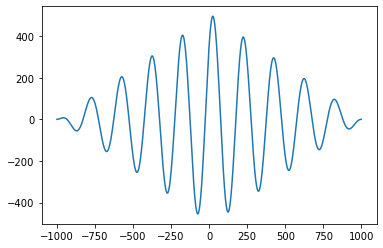

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Load two example signals
x = np.sin(np.linspace(0, 10*np.pi, 1000))
y = np.sin(np.linspace(0, 10*np.pi, 1000) + np.pi/4)

# Compute the cross-correlation
corr = np.correlate(x, y, mode='full')

# Plot the cross-correlation
lags = np.arange(-len(x)+1, len(x))
plt.plot(lags, corr)

# Find the maximum correlation and corresponding lag
max_corr_idx = np.argmax(corr)
lag = lags[max_corr_idx]

print(f"Lag: {lag}")